In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data into dataframe

In [3]:
#Loading data into dataframe
df = pd.read_csv('Leads.csv')

In [4]:
#Checking shape
df.shape

(9240, 37)

In [5]:
#Checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Performing data cleanup

In [7]:
# Checking for duplicate rows in our dataset
df['Lead Number'].nunique()

9240

In [8]:
# Convert all values to lowercase
df = df.applymap(lambda s: s.lower() if isinstance(s, str) else s)

In [9]:
# Replace 'Select' with NaN (indicating no option was selected)
df = df.replace('select', np.nan)

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

It's clear that many columns have a lot of missing values and are not useful. We'll remove columns with more than 35% missing values.

In [14]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [15]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

We have a lot of null values in four columns. Removing rows with these null values would result in losing important data. Instead, we'll replace the NaN values with 'not provided'. This way, we keep all the data and reduce null values. If these entries aren't useful in the model, we can remove them later.

In [17]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [18]:
# Checking if there are columns with one unique value since it won't affect our analysis
df2.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            39
Lead Source                                        20
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
What is your current occupation                     7
Lead Origin                                         5
What matters most to you in choosing a course       4
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [19]:
#Dropping column Prospect ID as all the values are unique
df2= df2.drop(['Prospect ID'],axis=1)

In [20]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [21]:
#Removing all the null values as the % is very less and wont' impact the EDA
df_final = df2[df2.isnull().sum(axis=1) <1]

In [22]:
# Rechecking the percentage of missing values
round(100*(df_final.isnull().sum()/len(df_final.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [23]:
df_final.shape

(9074, 21)

Exploratory Data Analysis

In [25]:
# Display information about df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

Plotting on Categorical Variables

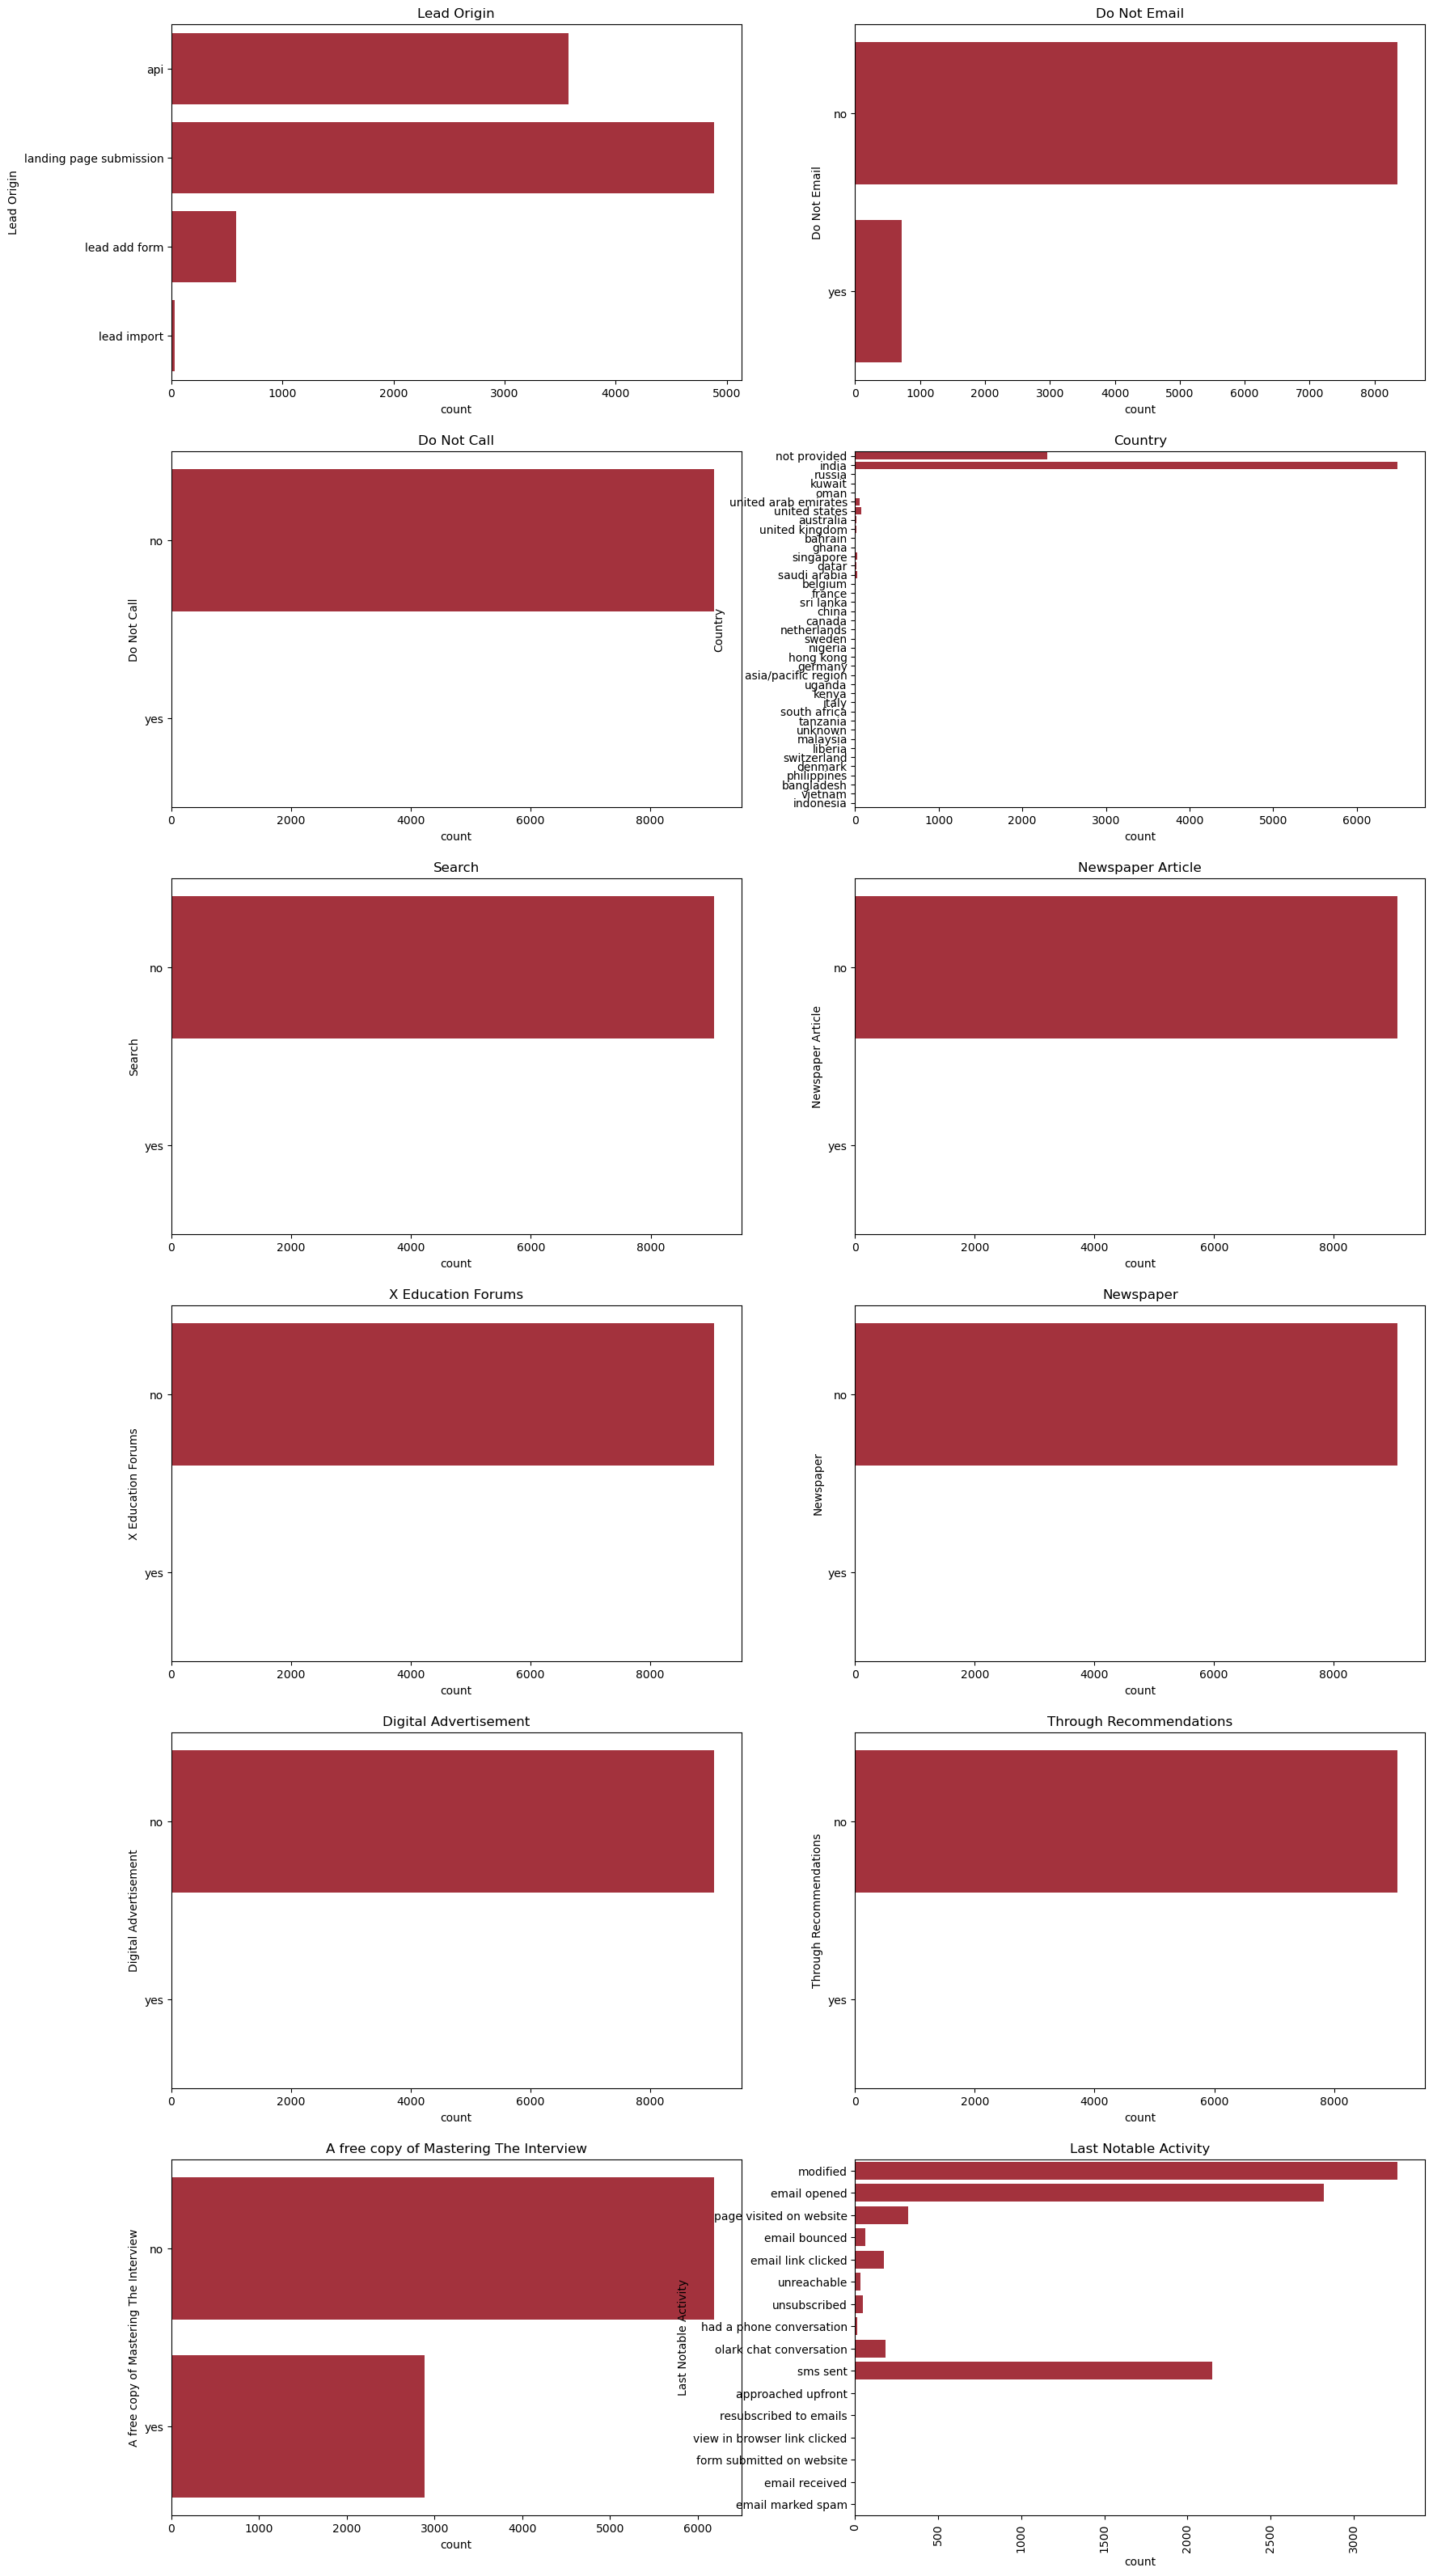

In [27]:
# Create a custom palette 
custom_palette = sns.color_palette("RdBu", 8)

# Apply the palette 
sns.set_palette(custom_palette)

plt.figure(figsize=(20, 40))

# Plotting Lead Origin
plt.subplot(6, 2, 1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

# Plotting Do Not Email
plt.subplot(6, 2, 2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

# Plotting Do Not Call
plt.subplot(6, 2, 3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

# Plotting Country
plt.subplot(6, 2, 4)
sns.countplot(df_final['Country'])
plt.title('Country')

# Plotting Search
plt.subplot(6, 2, 5)
sns.countplot(df_final['Search'])
plt.title('Search')

# Plotting Newspaper Article
plt.subplot(6, 2, 6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

# Plotting X Education Forums
plt.subplot(6, 2, 7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

# Plotting Newspaper
plt.subplot(6, 2, 8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

# Plotting Digital Advertisement
plt.subplot(6, 2, 9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

# Plotting Through Recommendations
plt.subplot(6, 2, 10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

# Plotting A free copy of Mastering The Interview
plt.subplot(6, 2, 11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

# Plotting Last Notable Activity with rotated x-axis labels
plt.subplot(6, 2, 12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation=90)
plt.title('Last Notable Activity')

# Display the plots
plt.show()


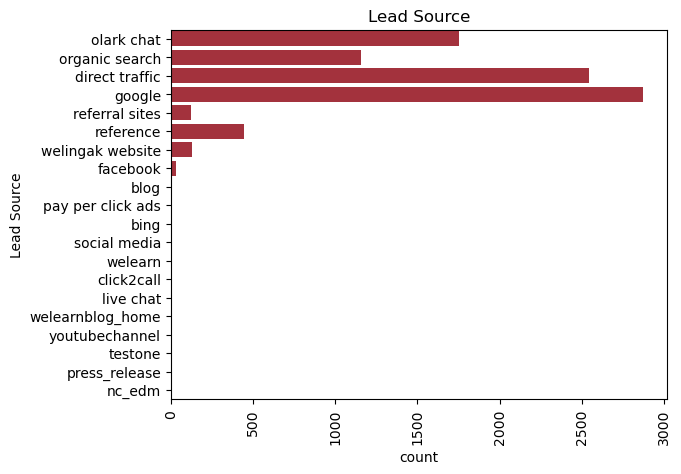

In [28]:
# Plot Lead Source with rotated x-axis labels
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()


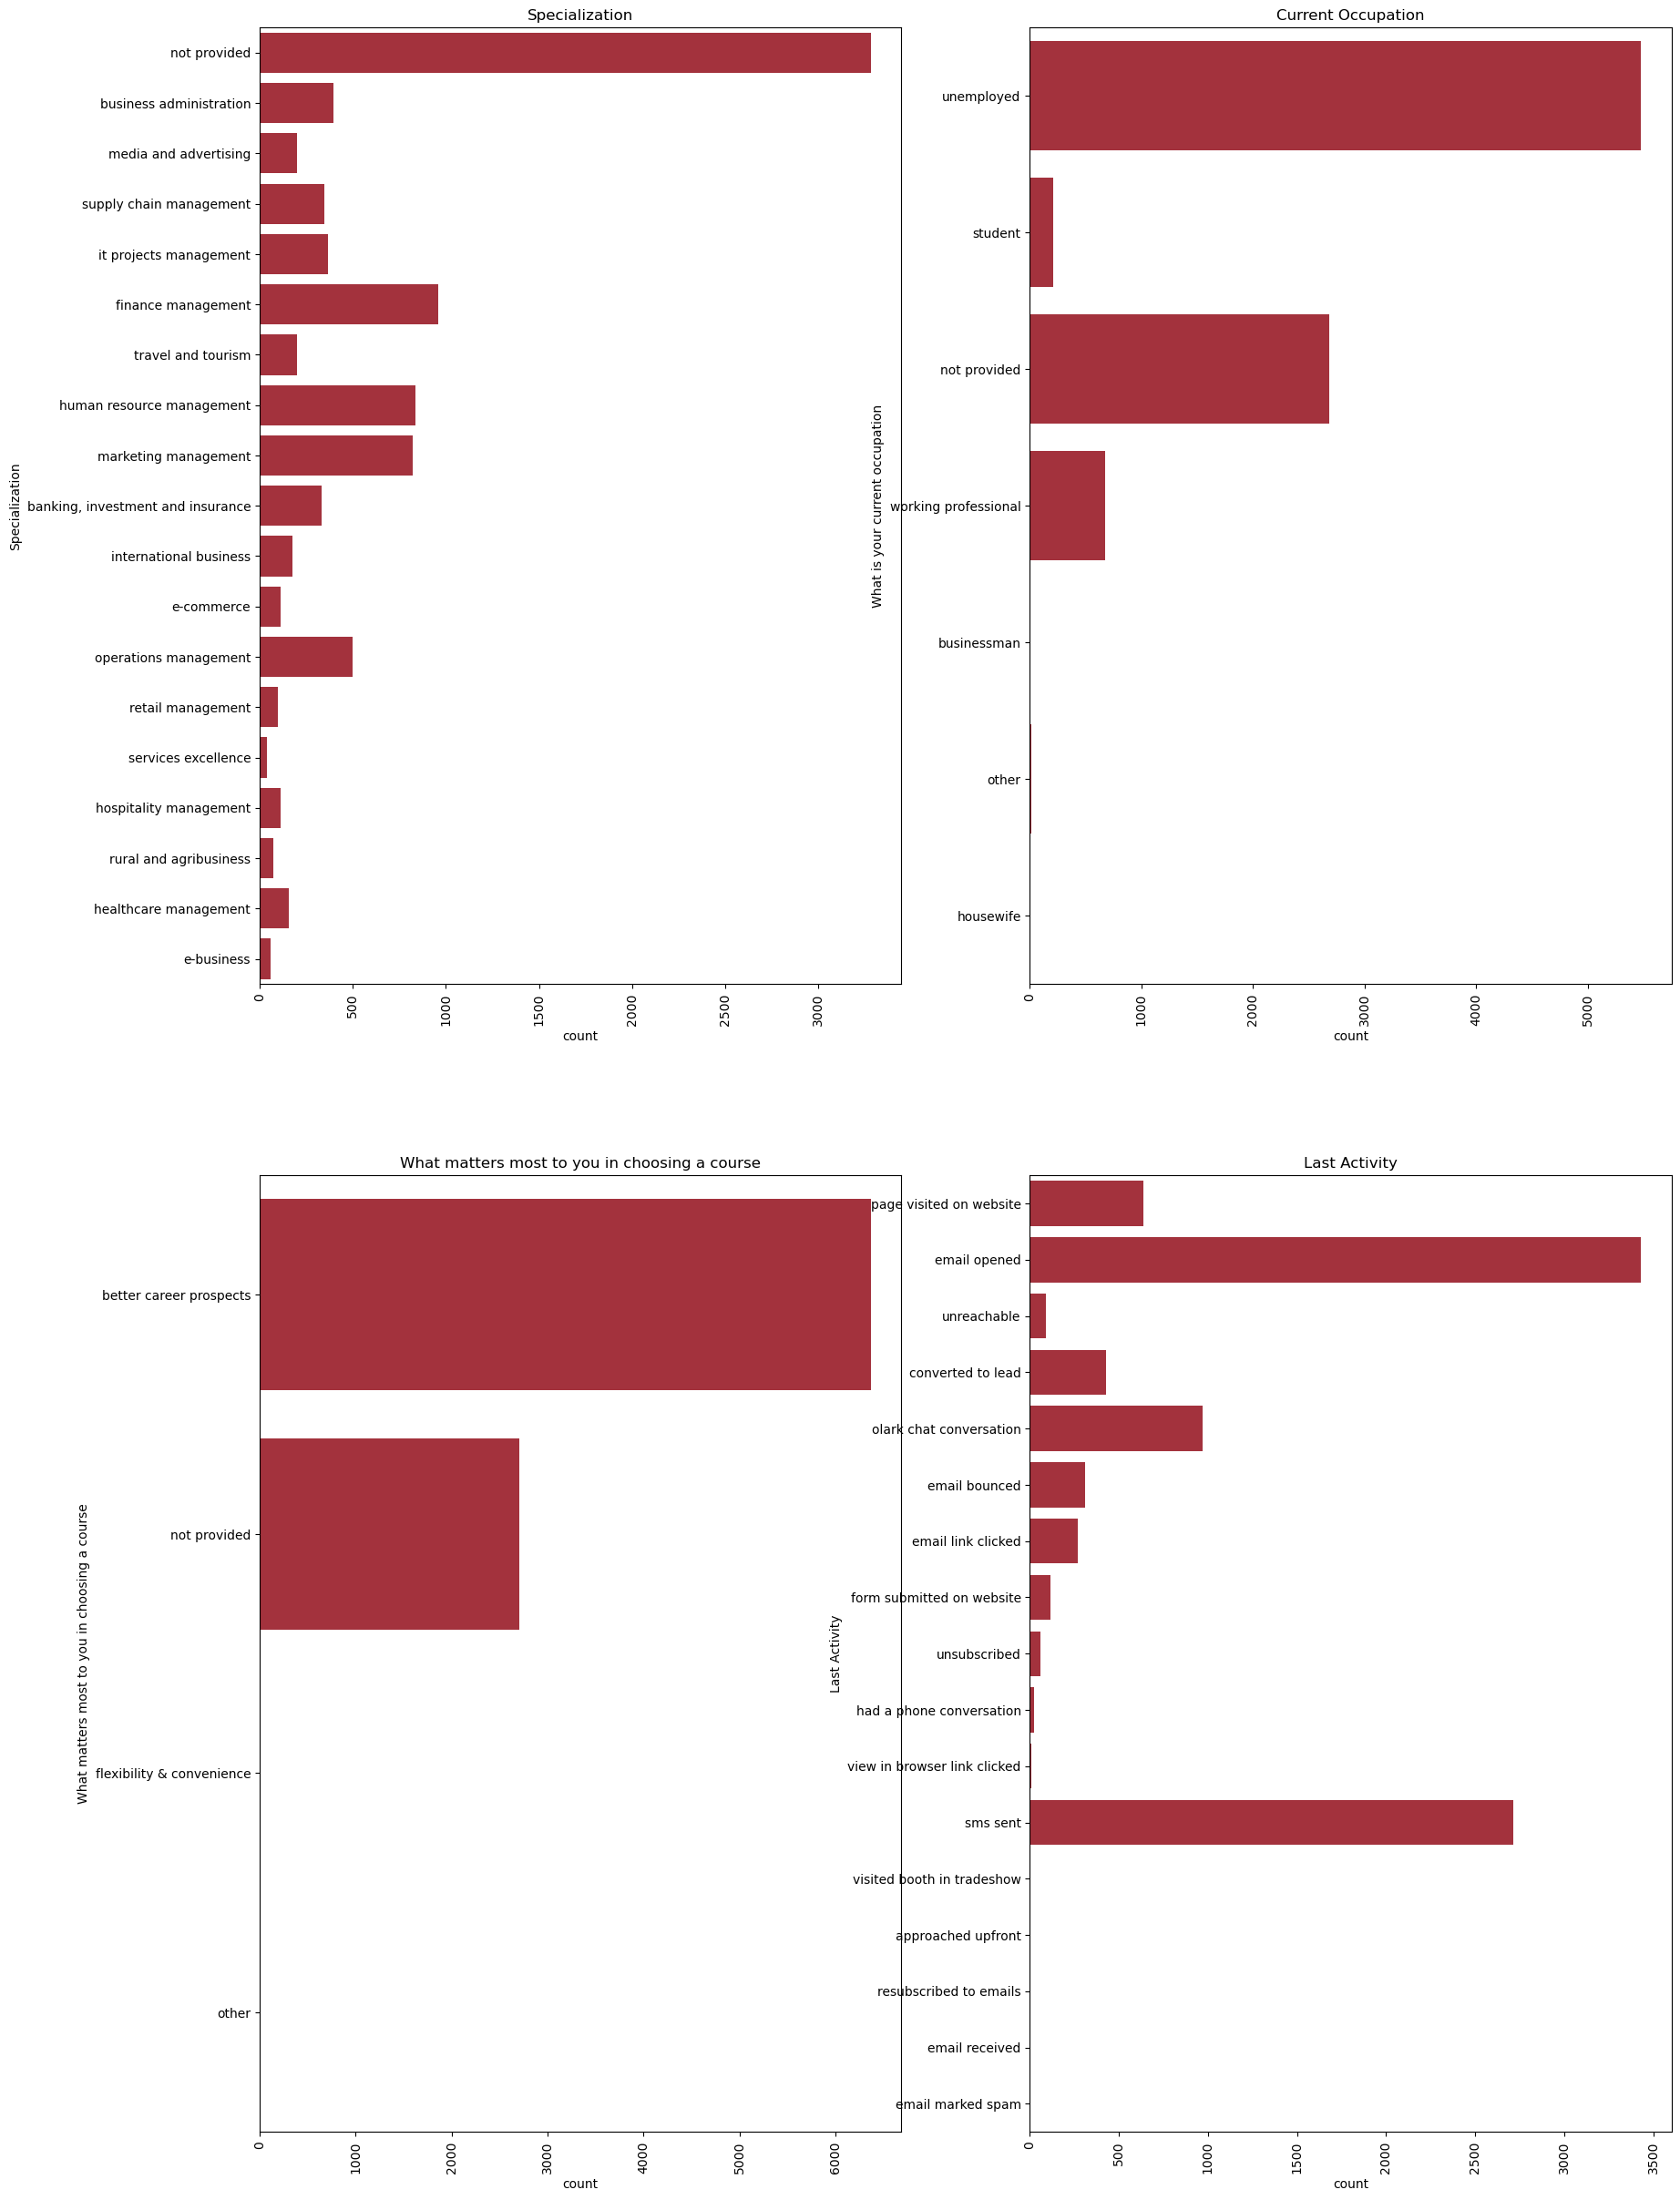

In [29]:
plt.figure(figsize=(20, 30))

# Plot Specialization with rotated x-axis labels
plt.subplot(2, 2, 1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation=90)
plt.title('Specialization')

# Plot Current Occupation with rotated x-axis labels
plt.subplot(2, 2, 2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation=90)
plt.title('Current Occupation')

# Plot What matters most to you in choosing a course with rotated x-axis labels
plt.subplot(2, 2, 3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')

# Plot Last Activity with rotated x-axis labels
plt.subplot(2, 2, 4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation=90)
plt.title('Last Activity')

plt.show()


Plotting on Numerical Variables

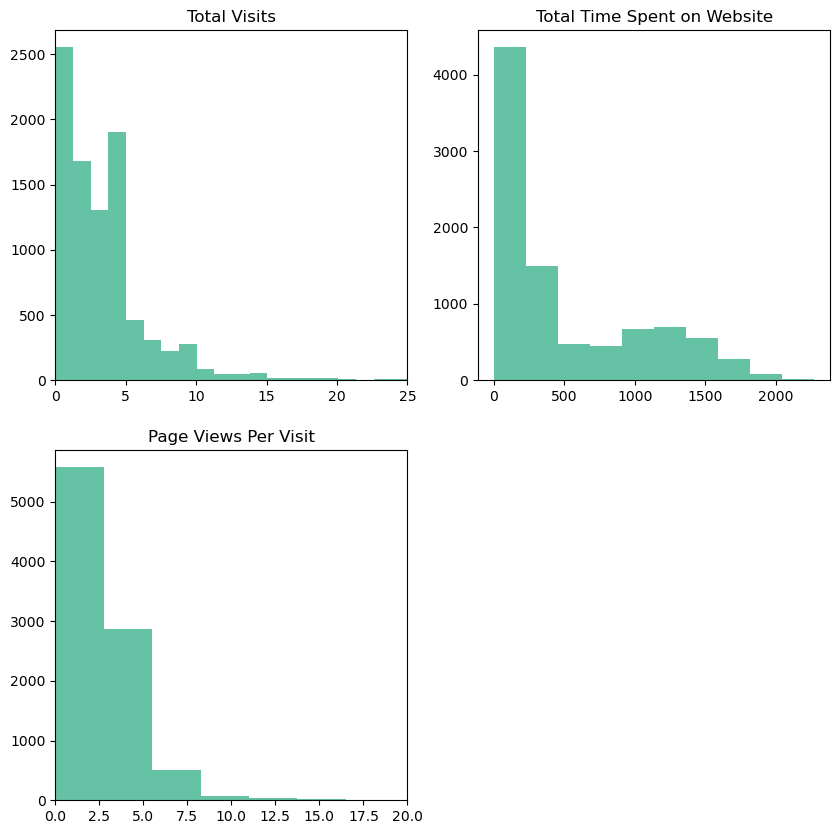

In [31]:
# Create a custom palette 
custom_palette = sns.color_palette("Set2", 8)

# Apply the palette 
sns.set_palette(custom_palette)

plt.figure(figsize=(10, 10))

# Plotting Total Visits histogram
plt.subplot(2, 2, 1)
plt.hist(df_final['TotalVisits'], bins=200)
plt.title('Total Visits')
plt.xlim(0, 25)

# Plotting Total Time Spent on Website histogram
plt.subplot(2, 2, 2)
plt.hist(df_final['Total Time Spent on Website'], bins=10)
plt.title('Total Time Spent on Website')

# Plotting Page Views Per Visit histogram
plt.subplot(2, 2, 3)
plt.hist(df_final['Page Views Per Visit'], bins=20)
plt.title('Page Views Per Visit')
plt.xlim(0, 20)

# Display the plots
plt.show()


Relating all the categorical variables to Converted

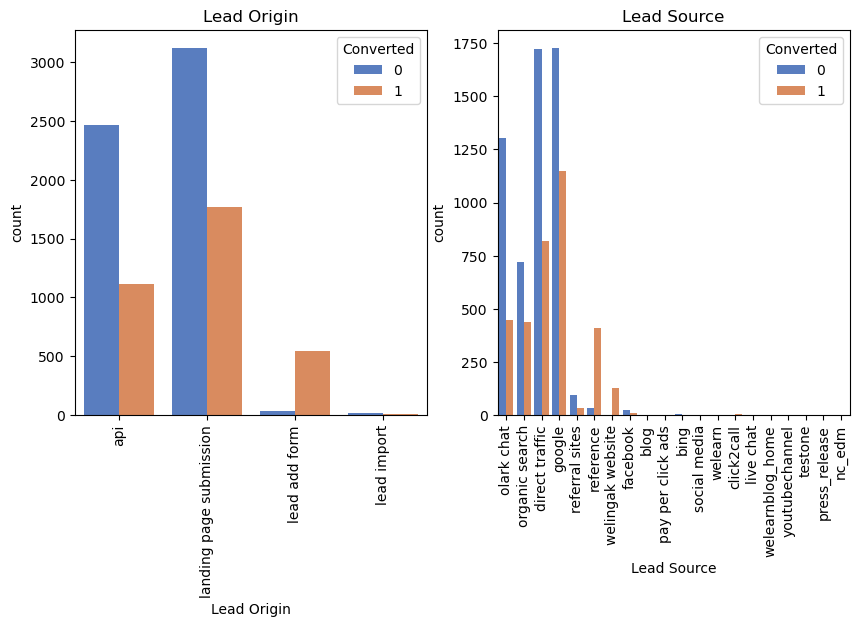

In [33]:
# Create a custom palette 
custom_palette = sns.color_palette("muted", 8)

# Apply the palette 
sns.set_palette(custom_palette)

plt.figure(figsize=(10, 5))

# Plot Lead Origin with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Origin', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Lead Origin')

# Plot Lead Source with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='Lead Source', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Lead Source')

# Display the plots
plt.show()


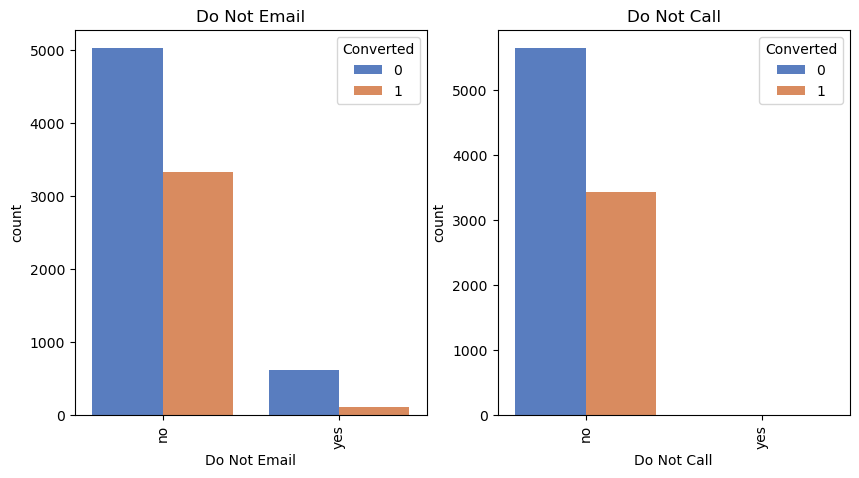

In [34]:
plt.figure(figsize=(10, 5))

# Plot Do Not Email with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Do Not Email')

# Plot Do Not Call with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Call', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Do Not Call')

# Display the plots
plt.show()


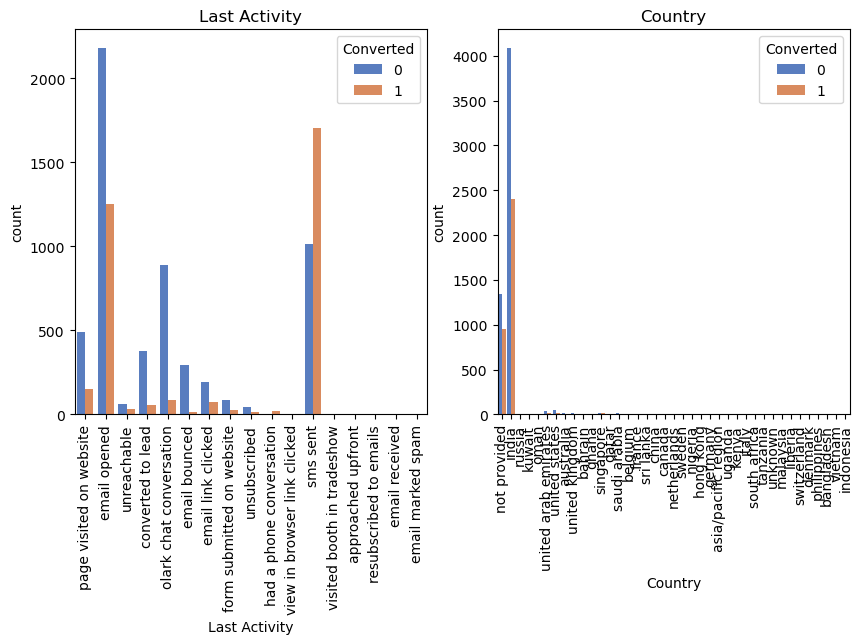

In [35]:
plt.figure(figsize=(10, 5))

# Plot Last Activity with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='Last Activity', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Last Activity')

# Plot Country with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='Country', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Country')

# Display the plots
plt.show()


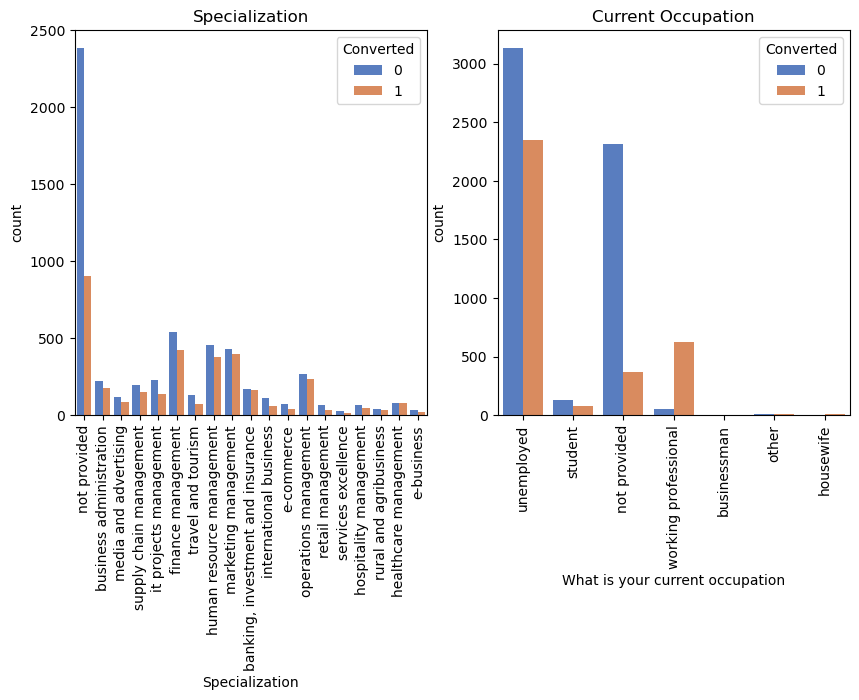

In [36]:
plt.figure(figsize=(10, 5))

# Plot Specialization with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='Specialization', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Specialization')

# Plot Current Occupation with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='What is your current occupation', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Current Occupation')

# Display the plots
plt.show()


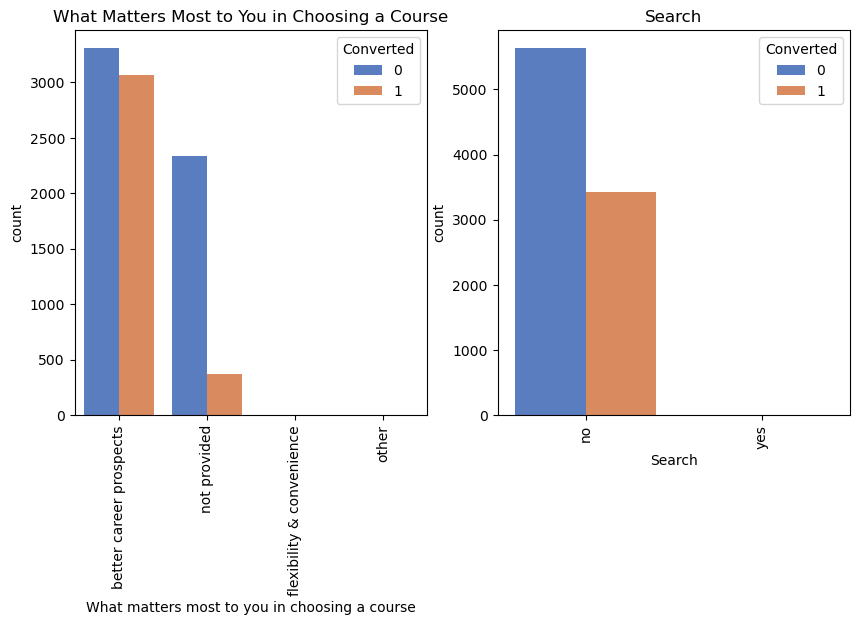

In [37]:
plt.figure(figsize=(10, 5))

# Plot What matters most to you in choosing a course with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('What Matters Most to You in Choosing a Course')

# Plot Search with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='Search', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Search')

# Display the plots
plt.show()


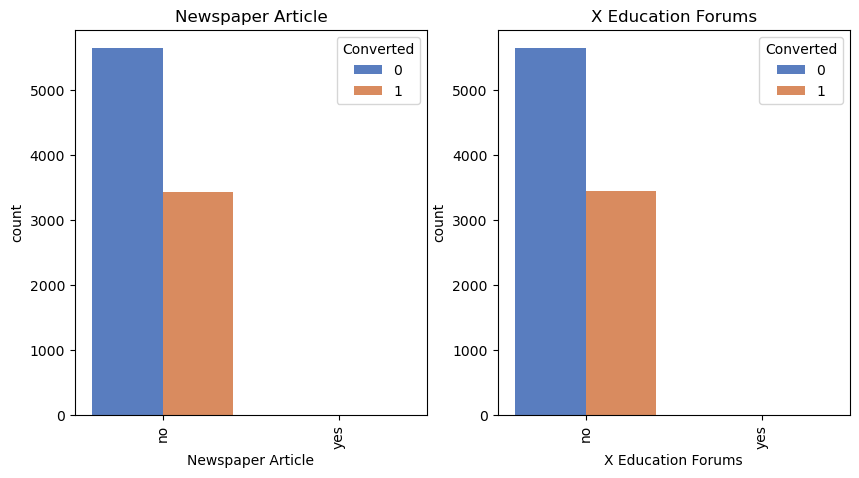

In [38]:
plt.figure(figsize=(10, 5))

# Plot Newspaper Article with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='Newspaper Article', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Newspaper Article')

# Plot X Education Forums with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='X Education Forums', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('X Education Forums')

# Display the plots
plt.show()


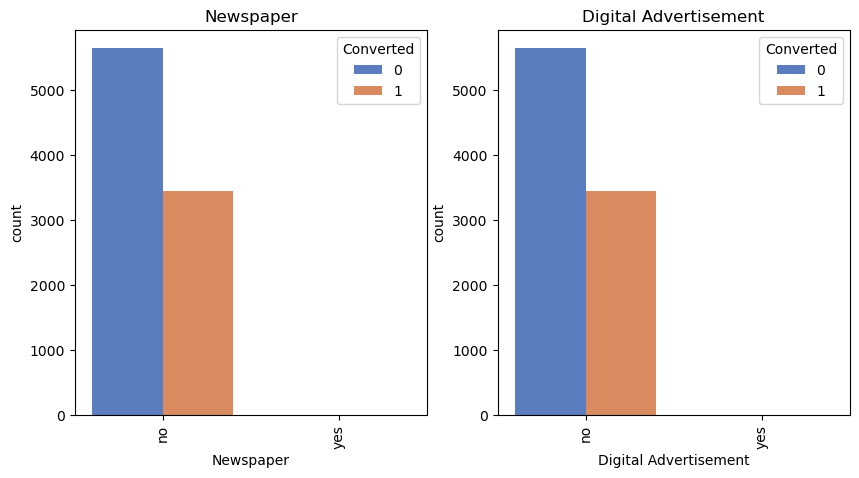

In [39]:
plt.figure(figsize=(10, 5))

# Plot Newspaper with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='Newspaper', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Newspaper')

# Plot Digital Advertisement with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='Digital Advertisement', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Digital Advertisement')

# Display the plots
plt.show()


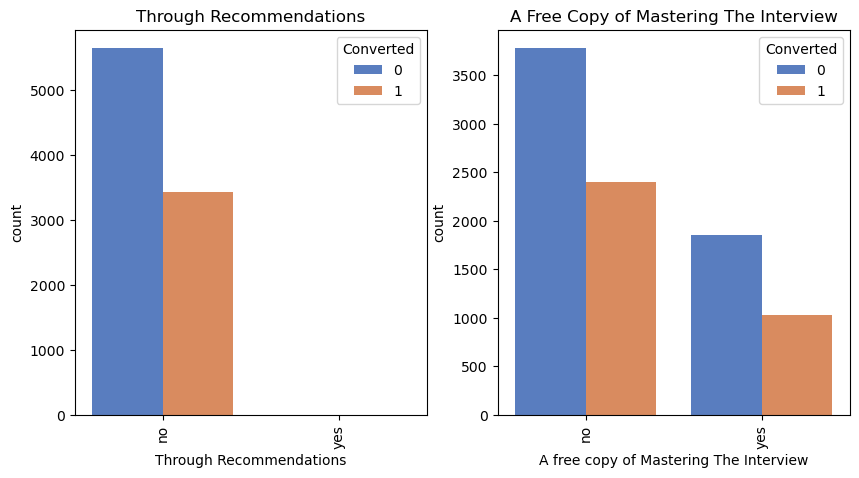

In [40]:
plt.figure(figsize=(10, 5))

# Plot Through Recommendations with conversion status and rotated x-axis labels
plt.subplot(1, 2, 1)
sns.countplot(x='Through Recommendations', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Through Recommendations')

# Plot A free copy of Mastering The Interview with conversion status and rotated x-axis labels
plt.subplot(1, 2, 2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('A Free Copy of Mastering The Interview')

# Display the plots
plt.show()


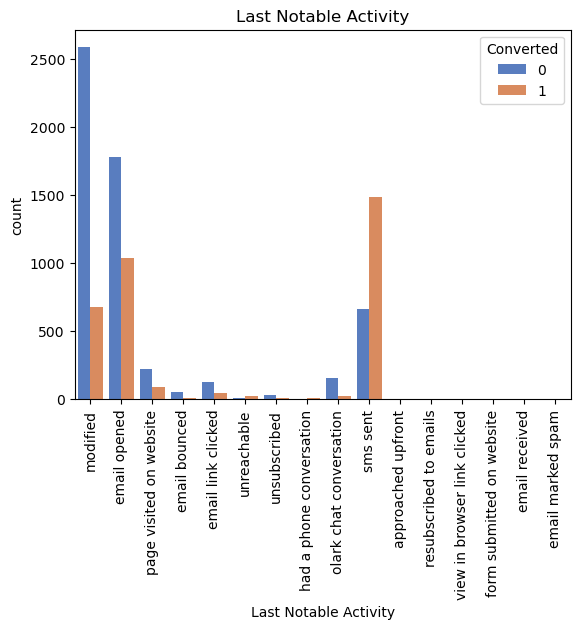

In [41]:
# Plot Last Notable Activity with conversion status and rotated x-axis labels
sns.countplot(x='Last Notable Activity', hue='Converted', data=df_final).tick_params(axis='x', rotation=90)
plt.title('Last Notable Activity')

# Display the plot
plt.show()


In [42]:
df_final

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,unemployed,better career prospects,no,no,no,no,no,no,no,email marked spam
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,unemployed,better career prospects,no,no,no,no,no,no,yes,sms sent
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,unemployed,better career prospects,no,no,no,no,no,no,yes,sms sent
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,not provided,not provided,no,no,no,no,no,no,no,sms sent


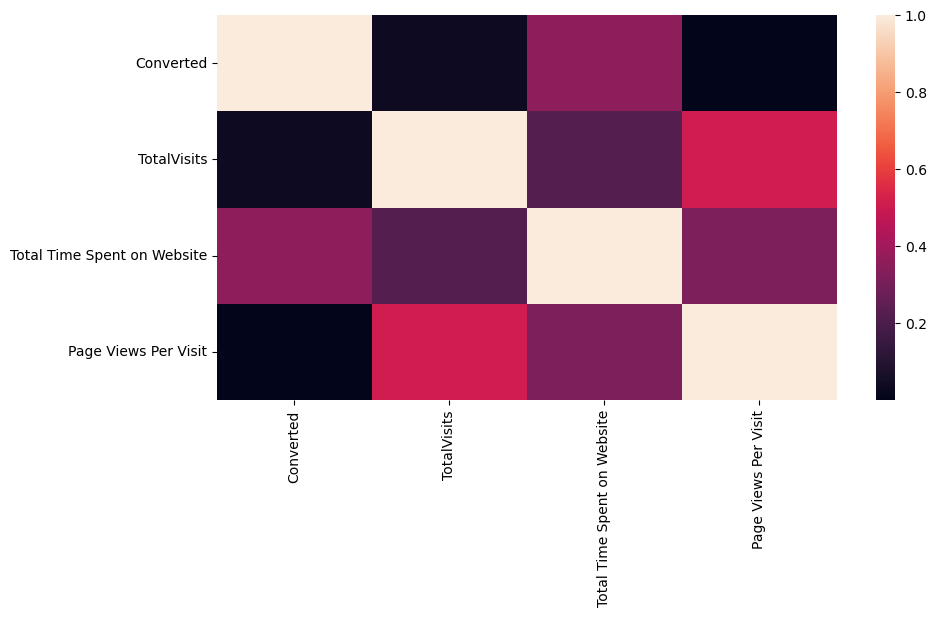

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the specified numeric columns
numeric_columns = df_final[['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Display descriptive statistics for the numeric columns
numeric_columns.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])

# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(numeric_columns.corr())
plt.show()

From the above Exploratory Data Analysis (EDA), it is evident that several elements have limited data and will likely be less significant for our analysis.

In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [46]:
# Checking the columns which are of type 'object'
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Convert boolean columns to integers
dummy = dummy.astype(int)

# Add the results to the master dataframe
df_final_combined = pd.concat([df_final, dummy], axis=1)
df_final_combined

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,saudi arabia,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [48]:
# Drop specified columns from the dataframe
columns_to_drop = [
    'What is your current occupation_not provided', 'Lead Origin', 'Lead Source', 'Do Not Email', 
    'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'Specialization_not provided', 
    'What is your current occupation', 'What matters most to you in choosing a course', 'Search',
    'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
    'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'
]
df_final_dum = df_final_combined.drop(columns=columns_to_drop, axis=1)
df_final_dum


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Splitting the dataset into training and testing sets.

In [50]:
# Import the required library
from sklearn.model_selection import train_test_split

In [51]:
# Assign all feature variables to X
X = df_final_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
# Assign the target variable to y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [54]:
#lets check the shape
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (6351, 80)
y_train Size (6351,)


Some numeric variables in the dataset have different scales. Let's proceed by scaling these variables.

In [56]:
# Importing the 'MinMax scaler' Library
from sklearn.preprocessing import MinMaxScaler

In [57]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.007968,0.178347,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


Let's examine the correlations now. Given the large number of variables, it's more practical to use a table instead of a heatmap.

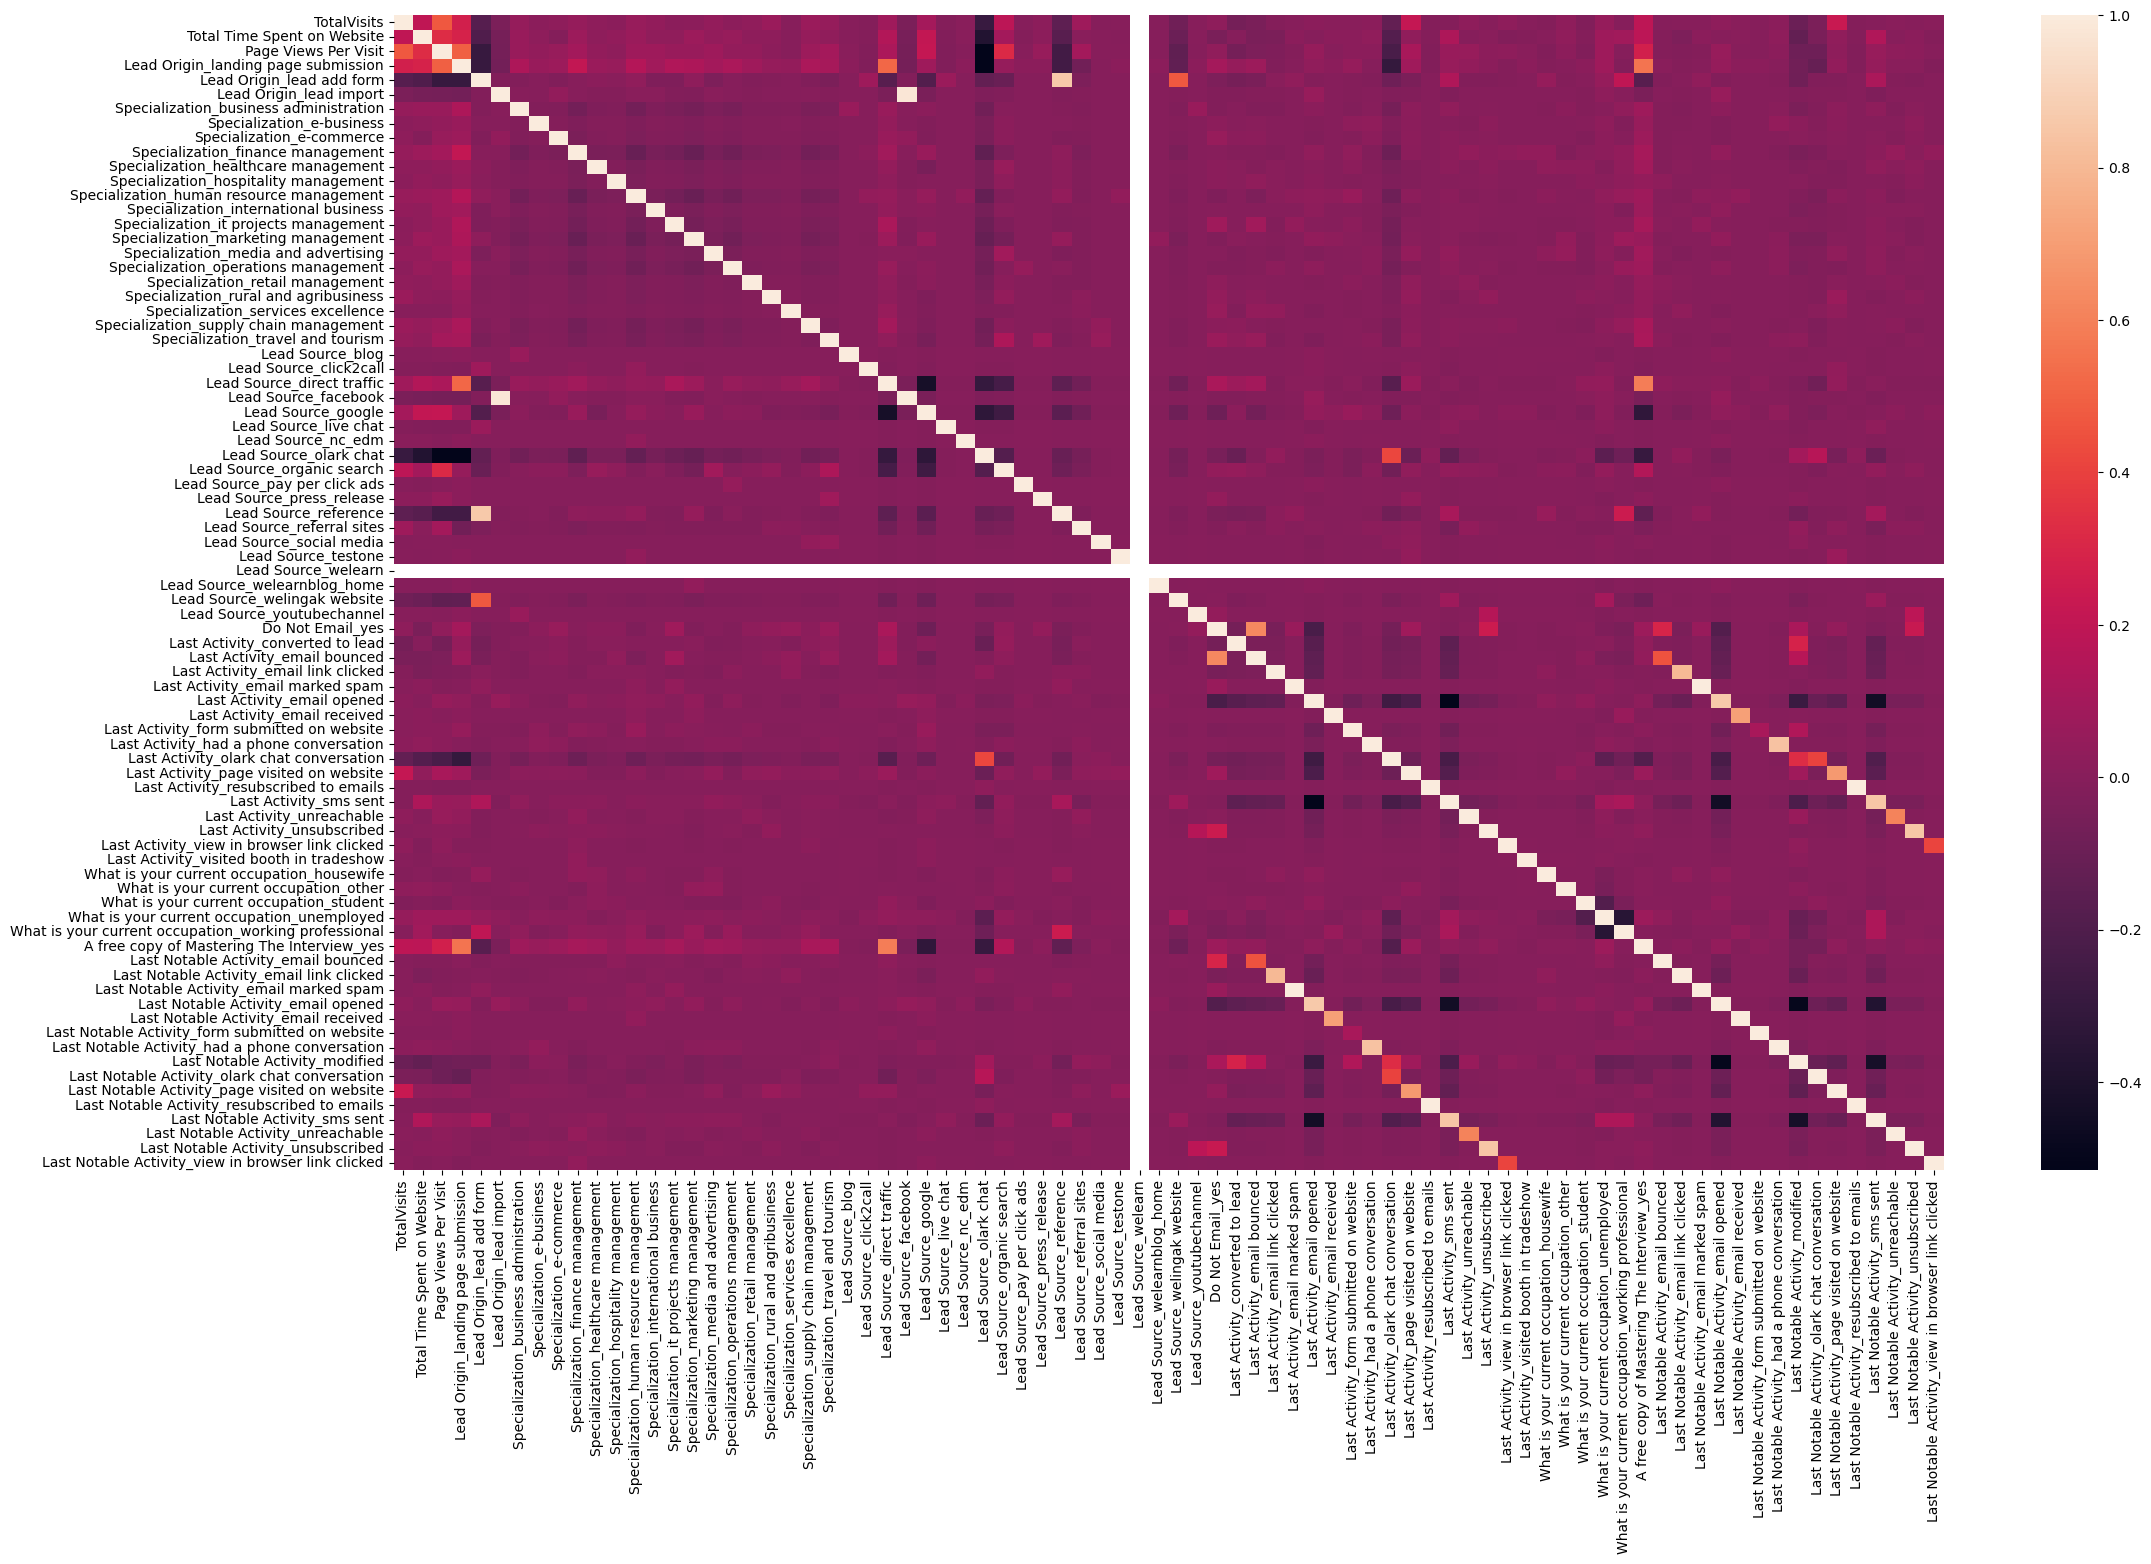

In [59]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(X_train.corr())
plt.show()

Let's transition to model building. Given the numerous variables in the dataset, it would be challenging to manage all of them. Therefore, it's best to use RFE (Recursive Feature Elimination) to select a smaller subset of features from the available pool.

In [61]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
# Import RFE
from sklearn.feature_selection import RFE

In [63]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [64]:
# Display the features selected by RFE along with their support and ranking
selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
selected_features


[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_landing page submission', False, 28),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 48),
 ('Specialization_business administration', False, 36),
 ('Specialization_e-business', False, 25),
 ('Specialization_e-commerce', False, 27),
 ('Specialization_finance management', False, 31),
 ('Specialization_healthcare management', False, 29),
 ('Specialization_hospitality management', False, 60),
 ('Specialization_human resource management', False, 32),
 ('Specialization_international business', False, 41),
 ('Specialization_it projects management', False, 30),
 ('Specialization_marketing management', False, 26),
 ('Specialization_media and advertising', False, 51),
 ('Specialization_operations management', False, 34),
 ('Specialization_retail management', False, 50),
 ('Specialization_rural and agribusiness', False, 35),
 ('Specialization_ser

In [65]:
# Putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

Now that we have the variables selected by RFE, and given our focus on statistical measures such as p-values and VIFs, let's use these variables to build a logistic regression model with statsmodels.

In [67]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [68]:
# Importing statsmodels
import statsmodels.api as sm

In [69]:
# Add a constant to X_train and fit a logistic regression model, then output the summary

X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.5
Date:                Tue, 21 Jan 2025   Deviance:                       5283.1
Time:                        15:58:54   Pearson chi2:                 6.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3942
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7008      0.095    -28.413      0.000      -2.887      -2.515
Total Time Spent on Website                              3.8457      0.146     26.370      0.000       3.560       4.132
Lead Origin_lead add form                                3.0105      0.218     13.801      0.000       2.583       3.438
Lead Source_direct traffic                              -0.5539      0.078     -7.100      0.000      -0.707      -0.401
Lead Source_welingak website                             1.9758      0.751      2.632      0.008       0.505       3.447
Do Not Email_yes                                        -1.6235      0.169     -9.607      0.000      -1.955      -1.292
Last Activity_converted to lead                         -1.3628      0.217     -6.285      0.000      -1.788      -0.938
Last Activity_had a phone conversation                   2.3030      0.731      3.152      0.002       0.871       3.735
Last Activity_olark chat conversation                   -1.0164      0.163     -6.249      0.000      -1.335      -0.698
Last Activity_sms sent                                   1.2167      0.074     16.388      0.000       1.071       1.362
What is your current occupation_housewife               23.5869   1.61e+04      0.001      0.999   -3.16e+04    3.16e+04
What is your current occupation_other                    1.9332      0.714      2.708      0.007       0.534       3.332
What is your current occupation_student                  1.4300      0.231      6.194      0.000       0.978       1.883
What is your current occupation_unemployed               1.2017      0.087     13.820      0.000       1.031       1.372
What is your current occupation_working professional     3.6566      0.198     18.491      0.000       3.269       4.044
Last Notable Activity_unreachable                        1.8443      0.496      3.721      0.000       0.873       2.816
========================================================================================================================
"""

Several variables have a p-value greater than 0.05, which we need to address. However, let's examine the VIFs first.

In [71]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_unemployed,2.10
0,Total Time Spent on Website,1.85
1,Lead Origin_lead add form,1.60
8,Last Activity_sms sent,1.55
2,Lead Source_direct traffic,1.44
3,Lead Source_welingak website,1.33
13,What is your current occupation_working profes...,1.31
4,Do Not Email_yes,1.08
5,Last Activity_converted to lead,1.06
7,Last Activity_olark chat conversation,1.05


The VIF values seem acceptable, but the p-values are problematic. Therefore, we will remove 'What is your current occupation_housewife'.

In [74]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [75]:
# Refit the model using the updated set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.2
Date:                Tue, 21 Jan 2025   Deviance:                       5298.5
Time:                        15:58:55   Pearson chi2:                 6.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6744      0.094    -28.390      0.000      -2.859      -2.490
Total Time Spent on Website                              3.8479      0.146     26.432      0.000       3.563       4.133
Lead Origin_lead add form                                3.0655      0.218     14.034      0.000       2.637       3.494
Lead Source_direct traffic                              -0.5526      0.078     -7.094      0.000      -0.705      -0.400
Lead Source_welingak website                             1.9243      0.751      2.563      0.010       0.453       3.396
Do Not Email_yes                                        -1.6283      0.169     -9.633      0.000      -1.960      -1.297
Last Activity_converted to lead                         -1.3690      0.217     -6.317      0.000      -1.794      -0.944
Last Activity_had a phone conversation                   2.2985      0.730      3.147      0.002       0.867       3.730
Last Activity_olark chat conversation                   -1.0249      0.163     -6.305      0.000      -1.343      -0.706
Last Activity_sms sent                                   1.2081      0.074     16.293      0.000       1.063       1.353
What is your current occupation_other                    1.9072      0.714      2.672      0.008       0.508       3.306
What is your current occupation_student                  1.4025      0.231      6.078      0.000       0.950       1.855
What is your current occupation_unemployed               1.1765      0.086     13.647      0.000       1.008       1.345
What is your current occupation_working professional     3.6304      0.197     18.388      0.000       3.243       4.017
Last Notable Activity_unreachable                        1.8304      0.495      3.699      0.000       0.860       2.800
========================================================================================================================
"""

In [76]:
# Create a VIF dataframe for all the variables
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.10
0,Total Time Spent on Website,1.85
1,Lead Origin_lead add form,1.59
8,Last Activity_sms sent,1.55
2,Lead Source_direct traffic,1.44
3,Lead Source_welingak website,1.33
12,What is your current occupation_working profes...,1.31
4,Do Not Email_yes,1.08
5,Last Activity_converted to lead,1.06
7,Last Activity_olark chat conversation,1.05


Both the p-values and VIFs are now satisfactory for all the variables. Let's proceed to make predictions with this final set of features.

In [78]:
# Predict probabilities on the training set using the 'predict' method
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.073055
1012    0.289795
9226    0.428054
4750    0.590646
7987    0.869414
1281    0.803952
2880    0.064921
4971    0.912231
7536    0.797185
1248    0.851371
dtype: float64

In [79]:
# Reshape the predictions into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07305505, 0.28979542, 0.42805421, 0.59064573, 0.8694135 ,
       0.80395196, 0.06492116, 0.91223093, 0.79718514, 0.85137066])

In [80]:
# Create a new DataFrame with the actual conversion flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.073055
1,0,0.289795
2,0,0.428054
3,1,0.590646
4,1,0.869414


In [81]:
# Create a new column 'Predicted' with 1 if Conversion_Prob > 0.5, else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Display the first few rows of the DataFrame
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.073055,0
1,0,0.289795,0
2,0,0.428054,0
3,1,0.590646,1
4,1,0.869414,1


Evaluating the model

In [83]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [84]:
# Generate the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3436,  469],
       [ 782, 1664]], dtype=int64)

In [85]:
# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8030231459612659


Extracting Values from a Confusion Matrix

In [87]:
# Assign values for true positives
TP = confusion[1, 1]
# Assign values for true negatives
TN = confusion[0, 0]
# Assign values for false positives
FP = confusion[0, 1]
# Assign values for false negatives
FN = confusion[1, 0]

In [88]:
# Calculating the 'sensitivity'
TP/(TP+FN)

0.6802943581357318

In [89]:
# Calculating the 'specificity'
TN/(TN+FP)

0.8798975672215109

With the current cutoff at 0.5, we have approximately 81% accuracy, 68% sensitivity, and 88% specificity.

Setting the threshold at 0.5 was an arbitrary choice to loosely assess the model's performance. To achieve optimal results, you need to fine-tune the threshold. Let's start by plotting an ROC curve to determine the AUC score

In [92]:
# Function to plot the ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - True Negative Rate)')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

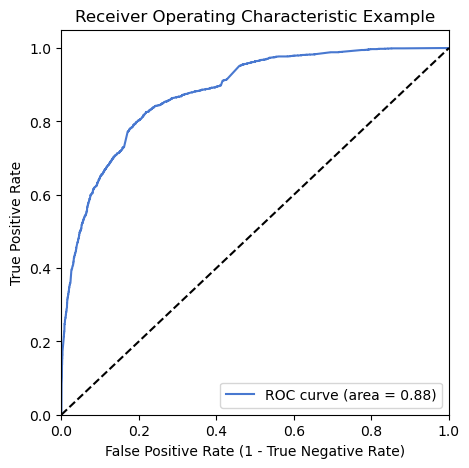

In [94]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the ROC curve (AUC) is 0.88, indicating excellent performance.

Finding Optimal Probability Cutoff Point Using Sensitivity-Specificity

In [97]:
# Create columns with different probability cutoffs
cutoff_values = [float(x) / 10 for x in range(10)]
for cutoff in cutoff_values:
    y_train_pred_final[cutoff] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.073055,0,1,0,0,0,0,0,0,0,0,0
1,0,0.289795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.428054,0,1,1,1,1,1,0,0,0,0,0
3,1,0.590646,1,1,1,1,1,1,1,0,0,0,0
4,1,0.869414,1,1,1,1,1,1,1,1,1,1,0


In [98]:
# Create a DataFrame to store accuracy, sensitivity, and specificity values at different probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])

# Generate confusion matrices to calculate accuracy, sensitivity, and specificity for each probability cutoff
from sklearn.metrics import confusion_matrix

cutoff_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for cutoff in cutoff_values:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[cutoff])
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    cutoff_df.loc[cutoff] = [cutoff, accuracy, sensitivity, specificity]

cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.625571,0.978332,0.404609
0.2,0.2,0.721776,0.890025,0.616389
0.3,0.3,0.787120,0.842600,0.752369
0.4,0.4,0.805228,0.783729,0.818694
0.5,0.5,0.803023,0.680294,0.879898
0.6,0.6,0.799244,0.600572,0.923688
0.7,0.7,0.779247,0.509403,0.948271
0.8,0.8,0.756259,0.417007,0.968758
0.9,0.9,0.709809,0.263287,0.989501


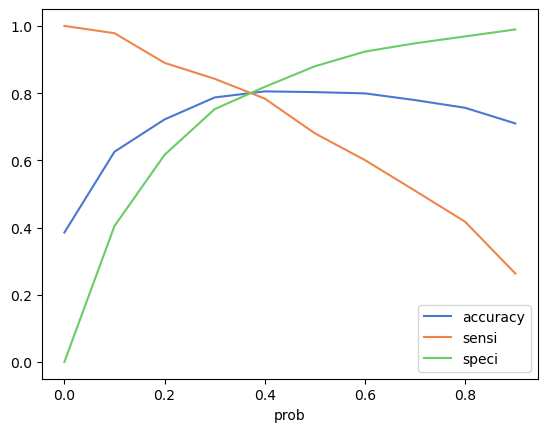

In [99]:
# Plot the accuracy, sensitivity, and specificity as a function of probability cutoff
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The graph indicates that the optimal cutoff point is 0.35.

Evaluating final model on train data

In [102]:
# Creating pred_final column and generating prediction based on probability cutoff .32
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.073055,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.289795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.428054,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.590646,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.869414,1,1,1,1,1,1,1,1,1,1,0,1


In [103]:
# Evaluate the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7995591245473154

In [104]:
# Generate the confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_matrix2

array([[3097,  808],
       [ 465, 1981]], dtype=int64)

In [105]:
# Evaluate other metrics

TP = confusion_matrix2[1, 1]  # True positives
TN = confusion_matrix2[0, 0]  # True negatives
FP = confusion_matrix2[0, 1]  # False positives
FN = confusion_matrix2[1, 0]  # False negatives

In [106]:
# Calculating the 'Sensitivity'
TP/(TP+FN)

0.8098937040065413

In [107]:
# Calculating the 'Specificity'
TN/(TN+FP)

0.7930857874519847

With the current cutoff set at 0.35, our accuracy, sensitivity, and specificity are all approximately 80%.

Evaluating final model on test data

In [110]:
# Scale the test set using 'transform' method
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [111]:
# Select all columns from the final training model
col = X_train.columns

In [112]:
# Select columns from X_train for X_test
X_test = X_test[col]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Display X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
3271,1.0,0.070530,0,0,0,0,0,0,0,0,0,0,0,0,0
1490,1.0,0.679695,0,1,0,0,0,0,0,0,0,0,0,1,0
7936,1.0,0.033243,0,0,0,0,0,0,0,0,0,0,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,0
3830,1.0,0.073675,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,0,0,0,0,1,0,0,0,0,0,0,0,0
2879,1.0,0.264600,0,0,0,0,1,0,0,0,0,0,1,0,0
6501,1.0,0.599730,0,1,0,0,0,0,0,1,0,1,0,0,0
7155,1.0,0.231357,0,1,0,0,0,0,0,0,0,0,0,0,0


In [113]:
# Store predictions of the test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Convert predictions to a DataFrame
y_pred_df = pd.DataFrame(y_test_pred)

# Convert y_test to a DataFrame
y_test_df = pd.DataFrame(y_test)

# Remove index for both DataFrames to concatenate them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concatenate y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Rename column
y_pred_final = y_pred_final.rename(columns={0: 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.082946
1,1,0.953420
2,0,0.072665
3,1,0.857372
4,0,0.083871


In [114]:
# Make predictions using a cutoff of 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.082946,0
1,1,0.953420,1
2,0,0.072665,0
3,1,0.857372,1
4,0,0.083871,0
...,...,...,...
2718,0,0.068477,0
2719,0,0.136027,0
2720,1,0.844403,1
2721,0,0.088129,0


In [115]:
# Calculate the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8049944913698127

In [116]:
# Create a confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_matrix2 

array([[1401,  333],
       [ 198,  791]], dtype=int64)

In [117]:
# Assign values for true positives
TP = confusion_matrix2[1, 1]

# Assign values for true negatives
TN = confusion_matrix2[0, 0]

# Assign values for false positives
FP = confusion_matrix2[0, 1]

# Assign values for false negatives
FN = confusion_matrix2[1, 0]

In [118]:
# Calculating the sensitivity
TP/(TP+FN)

0.7997977755308392

In [119]:
# Calculating the specificity
TN/(TN+FP)

0.8079584775086506

With a current cutoff of 0.35, our accuracy, sensitivity, and specificity are approximately 80%.

Let's proceed with building the training model utilizing the precision-recall perspective.

In [122]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7995591245473154

In [123]:
# Creating confusion matrix again
confusion_matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_matrix2

array([[3097,  808],
       [ 465, 1981]], dtype=int64)

In [124]:
# Assign the value of true positives
TP = confusion_matrix2[1, 1]

# Assign the value of true negatives
TN = confusion_matrix2[0, 0]

# Assign the value of false positives
FP = confusion_matrix2[0, 1]

# Assign the value of false negatives
FN = confusion_matrix2[1, 0]

In [125]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.710290426676228

In [126]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8098937040065413

Precision and recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

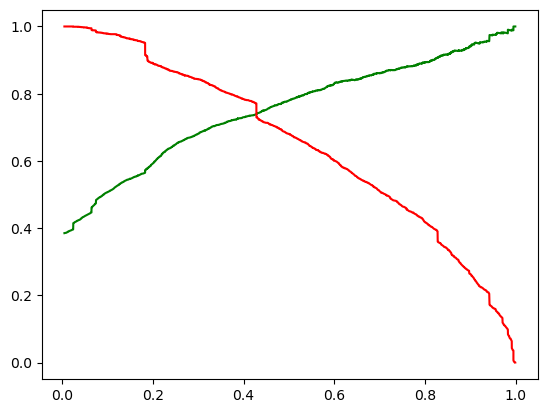

In [130]:
# Calculate precision, recall, and thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Plot precision-recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


With the current cut off as 0.41 we have Precision around 71% and Recall around 81%

Generating Predictions on the Test Set

In [133]:
# Making predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))

In [134]:
y_test_pred[:10]

3271    0.082946
1490    0.953420
7936    0.072665
4216    0.857372
3830    0.083871
1800    0.747895
6507    0.483306
4821    0.294939
4223    0.941348
4714    0.187505
dtype: float64

In [135]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Let's see the head
y_pred_1.head()

,0
3271,0.082946
1490,0.953420
7936,0.072665
4216,0.857372
3830,0.083871


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
# Checking the 'y_pred_final'
y_pred_final.head()

,Converted,0
0,0,0.082946
1,1,0.953420
2,0,0.072665
3,1,0.857372
4,0,0.083871


In [141]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.082946
1,1,0.953420
2,0,0.072665
3,1,0.857372
4,0,0.083871


In [143]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.082946,0
1,1,0.953420,1
2,0,0.072665,0
3,1,0.857372,1
4,0,0.083871,0
...,...,...,...
2718,0,0.068477,0
2719,0,0.136027,0
2720,1,0.844403,1
2721,0,0.088129,0


In [144]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8123393316195373

In [145]:
# Create the confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
confusion_matrix2

array([[1446,  288],
       [ 223,  766]], dtype=int64)

In [146]:
# Assign the value of true positives
TP = confusion_matrix2[1, 1]

# Assign the value of true negatives
TN = confusion_matrix2[0, 0]

# Assign the value of false positives
FP = confusion_matrix2[0, 1]

# Assign the value of false negatives
FN = confusion_matrix2[1, 0]

In [147]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7267552182163188

In [148]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7745197168857432

With the current cut off as 0.41 we have Precision around 73% and Recall around 77%